## Coding Assignment 2: Logistic Regression with Breast Cancer Data [SOLUTIONS]

### Introduction to Data Science
#### Last Updated: November 28, 2022
---  

### Skills Assessed

You will demonstrate these skills in the HW:
- Implement logistic regression using `sklearn`
- Pandas subsetting
- Compute binary classification metrics

---

### Instructions

We will continue with the Wisconsin breast cancer dataset in this assignment.  
Show all work and solutions for each question below. 

**INSTRUCTOR NOTE**: It is OK if students use `sklearn` functions for recall and precision, but it is better to let them use pandas for subsetting practice.

**TOTAL POINTS: 10**

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
datapath = '../datasets/wdbc.csv'

**Read in the Data**

In [3]:
df = pd.read_csv(datapath)
df.head()

,id,diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---

**Preprocessing**

The `diagnosis` field is the target variable. It needs to be converted to values of 0 and 1.  
We can make malignant = 1, benign = 0.

In [4]:
df['target'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

**Explore**

1. **(1 PT)** How many subjects have a malignant diagnosis? How many have a benign diagnosis?

In [5]:
# answer
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

2a. **(1 PT)** Create a boxplot where the x-axis is `target` and y-axis is `f3`.  

You can learn more about boxplots [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

<AxesSubplot:xlabel='target', ylabel='f3'>

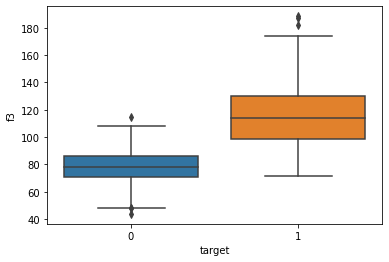

In [6]:
sns.boxplot(x='target',y='f3',data=df)

2b. **(1 PT)** What do you notice when you compare the plot for target=0 versus target=1?  
Do you think `f3` may be a good predictor variable? Why or why not?

answer

`f3` values are generally higher for target=1.   
Since there is good separation between the groups, `f3` may be a good predictor.

**Data Scaling**

We will fit a Logistic Regression model to the data, using predictors: `f1`,`f2`, and `f3`

3. **(1 PT)** Notice that `f3` is an order of magnitude larger than `f1` and `f2`.  
Scale the predictors using `StandardScaler()`

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X = df[['f1','f2','f3']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369],
       [ 1.82982061, -0.35363241,  1.68595471],
       [ 1.57988811,  0.45618695,  1.56650313],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578],
       [ 1.83834103,  2.33645719,  1.98252415],
       [-1.80840125,  1.22179204, -1.81438851]])

**Fit the logistic regression model**

In [9]:
y = df['target'].values

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

4. **(1 PT)** Extract the model intercept

In [10]:
model.intercept_

array([-18.17021723])

Predict the cell types, storing the predictions in a new column

In [11]:
# store the predictions in a new column
df['label_predicted'] = model.predict(X)

5. **(1 PT)** Compute the accuracy of the model, where accuracy = #correct / #total

In [12]:
len(df[df['label_predicted'] == df['target']]) / len(df)

0.9086115992970123

Notice this is higher than the example in class using `f1`, `f2` as predictors

6. **(1 PT)** Compute the precision of the model  
HINT: To compute the number of records where column A is 1 AND column B is 1, you can write:

In [22]:
# len(df[ (df['A'] == 1) & (df['B'] == 1) ])

In [24]:
len(df[ (df['label_predicted'] == 1) & (df['target'] == 1) ]) / len( df[df['label_predicted'] == 1])

0.9

7. **(1 PT)** Compute the recall of the model

In [25]:
len(df[ (df['label_predicted'] == 1) & (df['target'] == 1) ]) / len( df[df['target'] == 1])

0.8490566037735849

Compute a predicted label called `pred_label2` as follows:

- if predicted probability > 0.8, then 1 else 0

this makes it more stringent to predict 1  

Hint1: see the lecture notes on extracting probability of positive label  
Hint2: you can threshold the probabilities like this: prob > threshold, which returns True or False. True is treated as 1, and False is treated as 0.

In [28]:
df['pred_label2'] = model.predict_proba(X)[:,1] > 0.8

8a. **(1 PT)** Given `pred_label2`, compute the recall. Note the recall should be lower than before.

In [29]:
len(df[ (df['pred_label2'] == 1) & (df['target'] == 1) ]) / len( df[df['target'] == 1])

0.7169811320754716

8b. **(1 PT)** Given `pred_label2`, compute the precision. Note the precision should be higher than before.

In [30]:
len(df[ (df['pred_label2'] == 1) & (df['target'] == 1) ]) / len( df[df['pred_label2'] == 1])

0.9806451612903225

---

An important takeaway from this assignment is that changing the threshold changes the recall and precision.  
There is also a tradeoff between recall and precision. As one increases, the other generally decreases.